# Data Science Research Methods

### Contents

#### 1.Overview
#### 2.Preparatory Tasks
#### 3.Data Cleaning
#### 4.Data Correlation
#### 5.Exploratory Data Analysis
#### 6.Hypothesis Testing
#### 7.Modelling
#### 7.Decisions
#### 8.Summary
#### 9. References

### Overview

For this assignment, the dataset used is PAMAP2 which is an Activity Monitoring dataset that covers 18 different physical activities which are taken by 9 different subjects, 8 men and 1 woman, taken using 3 inertial measurement units and a heart rate monitor. 

The outcome of this assignment should be to gain insights based on the results of our analysis to determine how active an individual is based on the physical activities taken which are to be used to create hardware of software.

The three requirements of this assignment are to:

1. Carry out thoroughly exploratory data analysis and appropriately handle missing or dirty data

2. Develop and tests at least one hypothesis for a relationship between a single pair of attributes

3. Develop and test at least one model which uses multiple attributes to make predictions

### Preparatory Tasks

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split


A list of the file names has to be created in order to load all the files and create the dataframe. Moreover, a dictionary that will hold the names as well as numbers of each different activity has to be created in order to be able to understand which activity is being analysed at each phase.

Lists for each different category of IMU's have to be put together as well in order to have the column names for the dataframe. IMU's that will be used are for chest, ankle and hand.

Then all the different lists have to be put together to create the collection of the columns.

In [2]:
# Load data
list_of_files = ['PAMAP2_Dataset/Protocol/subject101.dat',
                 'PAMAP2_Dataset/Protocol/subject102.dat',
                 'PAMAP2_Dataset/Protocol/subject103.dat',
                 'PAMAP2_Dataset/Protocol/subject104.dat',
                 'PAMAP2_Dataset/Protocol/subject105.dat',
                 'PAMAP2_Dataset/Protocol/subject106.dat',
                 'PAMAP2_Dataset/Protocol/subject107.dat',
                 'PAMAP2_Dataset/Protocol/subject108.dat',
                 'PAMAP2_Dataset/Protocol/subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

len(columns)


54

In [3]:
dataCollection = pd.DataFrame()
for file in list_of_files:
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    dataCollection = dataCollection.append(procData, ignore_index=True)

dataCollection.reset_index(drop=True, inplace=True)
dataCollection.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


As it can be seen from the sample of the dataframe that we produced, there is some data cleaning required. For instance, activityID 0 must be removed completely from our dataset since this is transient period where the subject was not doing any particular activity as discussed in the readme file that was given. Data cleaning will be discussed thoroughly in the following section.

### Data Cleaning

From a look at the **PerformedActivitiesSummary** file which is part of the collection of files given, it can be seen that various data is missing and as the **readme** file comments on, there were some wireless disconnections in data collection therefore the missing data has to be accounted for and made up in a way that our data analysis will not be impacted. More in depth, each different activity has 8 or less subjects which did the activity and each different activity has NaN values for various subjects. Therefore some data filling has be applied. As for the NaN values in our data, it is best to use **interpolate** which is constructing a new data point out of a set of known data points.

As a guideline for the code written below, interpolation happens after removing 'activity 0' as it has very noisy and would data which would impact the output massively as the values given in heart rate would not be produced from the data point set that is of activities that actually matter. 

In [4]:
def dataCleaning(dataCollection):
        dataCollection = dataCollection.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                             'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                             'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                             axis = 1)  # removal of orientation columns as they are not needed
        dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index) #removal of any row of activity 0 as it is transient activity which it is not used
        dataCollection = dataCollection.apply(pd.to_numeric, errors = 'coerse') #removal of non numeric data in cells
        dataCollection = dataCollection.interpolate() #removal of any remaining NaN value cells by constructing new data points in known set of data points
        
        return dataCollection


In [5]:
dataCol = dataCleaning(dataCollection)

In [6]:
dataCol.reset_index(drop = True, inplace = True)
dataCol.head(10)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,...,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,...,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1
7,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,...,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1
8,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,...,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1
9,37.75,1,100.0,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,...,9.63189,-1.70699,0.326105,0.029874,-0.010763,0.005133,-60.7680,-37.4206,-58.8735,1


The reason why heartrate still has NaN values is because interpolation calculates the values around the NaN cell. Since the first cells are NaN it is normal to generate new NaN values after interpolation. To overcome this problem we can assume that the value of the first 4 cells is 100 since the values after the index 4 is 100. Doing so will eliminate any NaN values from our dataset.

In [7]:
dataCol.isnull().sum()

timestamp           0
activityID          0
heartrate           4
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

The reason why HR still has nan values is because the interpolation calculates the values around the nan cell. Since the first cells are nan it is normal to generate new nan values after interpolation. To overcome this problem we can assume that the value of the first 4 cells is 100 since the values after the index 4 is 100.

In [8]:
for i in range(0,4):
    dataCol["heartrate"].iloc[i]=100

C:\Users\Andreas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


It is clear that there are no missing values but we can check just to be sure. 

In [9]:
dataCol.isnull().sum()

timestamp           0
activityID          0
heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

As we can see, there are no more missing values. We can now move into Exploratory Data Analysis.

## Exploratory Data Analysis

#### Splitting Data in Train and Test sets

Before splitting our data, it is best if we first check if the classes are balanced which would imply that stratification is not needed for our split. If classes' weights are unbalanced, we should proceed with stratifying while splitting the data. Stratified sampling is the process of taking samples of all classes and putting them on the sub-sets created for train and test sets. It helps with getting better results when the distribution of the weights of the classes is not normal. Normal distribution would imply that each class' weight is similar with all other weights of classes. 

## See class distribution/ration
Check if our dataset is balanced

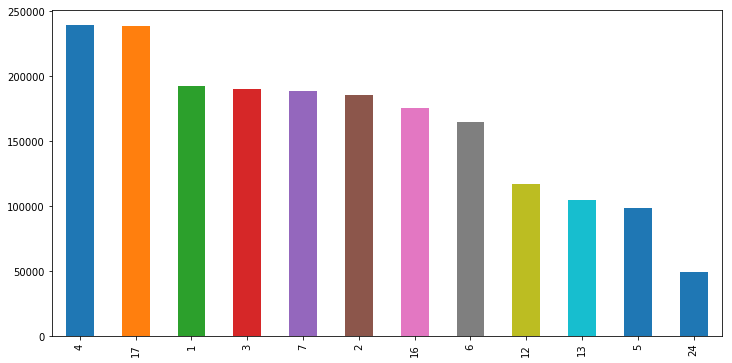

In [10]:
dataCol['activityID'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.show()

As the above plot shows, our classes are mostly balanced. Therefore, we proceed with splitting the data into train and test sets. The most common split in the industry is a 80% split for train set and 20% for test set, which is the split fraction that will be used. 

In [11]:
train_df = dataCol.sample(frac=0.8, random_state=1)
test_df = dataCol.drop(train_df.index)

We need to check some statistics/insights from the describe method from pandas as it can provide further results that we need to know as to how our data is being processed  for our analysis.

In [12]:
train_df.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
count,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,...,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06
mean,1.705049e+03,8.080534e+00,1.074758e+02,3.275138e+01,-4.953526e+00,3.581113e+00,3.603514e+00,-4.886385e+00,3.570863e+00,3.787763e+00,...,9.374706e+00,-4.445267e-02,-2.175620e+00,1.027736e-02,-3.649406e-02,5.607242e-03,-3.157962e+01,1.394841e+00,1.725137e+01,4.566578e+00
std,1.093592e+03,6.175064e+00,2.699031e+01,1.794207e+00,6.239143e+00,6.886169e+00,3.958145e+00,6.245060e+00,6.585066e+00,3.945398e+00,...,6.067489e+00,7.183548e+00,3.475628e+00,1.126197e+00,6.380780e-01,2.011908e+00,1.834688e+01,2.168353e+01,1.969368e+01,2.333375e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,...,-6.114200e+01,-6.190350e+01,-6.231480e+01,-1.416200e+01,-1.304010e+01,-1.401960e+01,-1.726240e+02,-1.379080e+02,-1.027160e+02,1.000000e+00
25%,7.442925e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.970020e+00,1.057830e+00,1.162090e+00,-8.867070e+00,1.055563e+00,1.365070e+00,...,8.396590e+00,-2.073120e+00,-3.399390e+00,-2.081648e-01,-1.066463e-01,-4.416657e-01,-4.170160e+01,-1.246927e+01,3.799633e+00,2.000000e+00
50%,1.480090e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.449130e+00,3.525300e+00,3.432840e+00,-5.377104e+00,3.566820e+00,3.663470e+00,...,9.550020e+00,-2.252810e-01,-1.993145e+00,4.636280e-03,-3.977450e-03,-2.336400e-03,-3.400060e+01,7.672570e-01,1.876795e+01,5.000000e+00
75%,2.664000e+03,1.300000e+01,1.240000e+02,3.406250e+01,-9.581008e-01,6.450507e+00,6.532445e+00,-9.061720e-01,6.458267e+00,6.778200e+00,...,1.028160e+01,1.920960e+00,-5.958823e-01,1.308070e-01,1.160640e-01,9.121635e-02,-1.789610e+01,1.782927e+01,3.120910e+01,7.000000e+00
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,6.196930e+01,6.204900e+01,6.093570e+01,1.742040e+01,1.358820e+01,1.448270e+01,9.155160e+01,9.369920e+01,1.469000e+02,9.000000e+00


We are going to focus on heart rate as it is our most precice meter of check for tracking subjects during activities as implied by the various indications on the readme file of the dataset. With that in mind, looking at the table, we can observe that the mean heart rate throughout the dataset is 107.4 . Furthermore the minimum heart rate is 57 and the maximum heart rate is 202. The quartiles that are shown can be further analysed by plotting a box plot which will help with understanding our outliers and quartiles groups and also shown the mean of our data's heart rate.

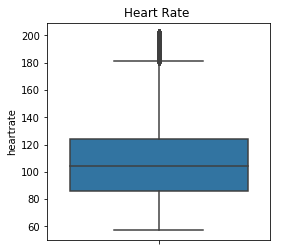

In [13]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Heart Rate ")
ax = sns.boxplot(y=train_df["heartrate"])

Looking at the box plot, we can see that the outliers have heart rate from 180 up to 202. Our highest quartile group out of the four starts from 124 which is the end of the Inter-quartile range and finishes at 180 which also makes it our biggest group by looking at the size of it on the box plot compared to the other quartiles. Meaning that the biggest amount of subjects on the activities performed had heart rate of 124 up to 180. Our third quartile group starts from the mean value which is 107.4 which is where the horizontal line in our box is, and finishes at the end of the Inter-quartile range which is 124. Our second quartile group, starts from the start of the Inter-quartile range which is 86 and ends at the mean value 124. Our first quartile group starts from the lowest data point, 57 and ends at the start of the Inter-quartile range 86. Our box plot also shows that most subjects performed some activities at a statistically similar way but failed to do the same in all activities which explains the big upper quartile group.

To find the most cumbersome activities we have to plot a bar chart which will show the mean values of heart rate for each activity that was performed. This will in return enable us to analyse further specific activity data. The names of the activities will be used for easier analysis of results.

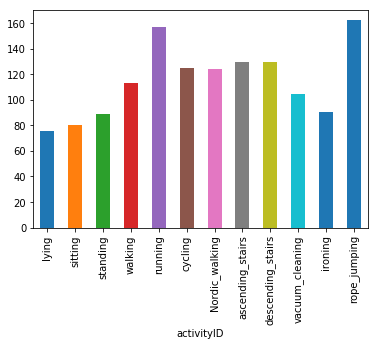

In [15]:
df_hr_act = train_df['heartrate'].groupby(train_df['activityID']).mean()
df_hr_act.index = df_hr_act.index.map(activityIDdict)
df_hr_act.plot(kind='bar')

The bar chart shows that Rope Jumping and Running are the most cumbersome activities out of all the activities.

To check further on our data to see any anormalities, we have to plot a heat map which will show whether our data has correlations inbetween it. All columns will be used in order to understand the extend of problems, if there are any.

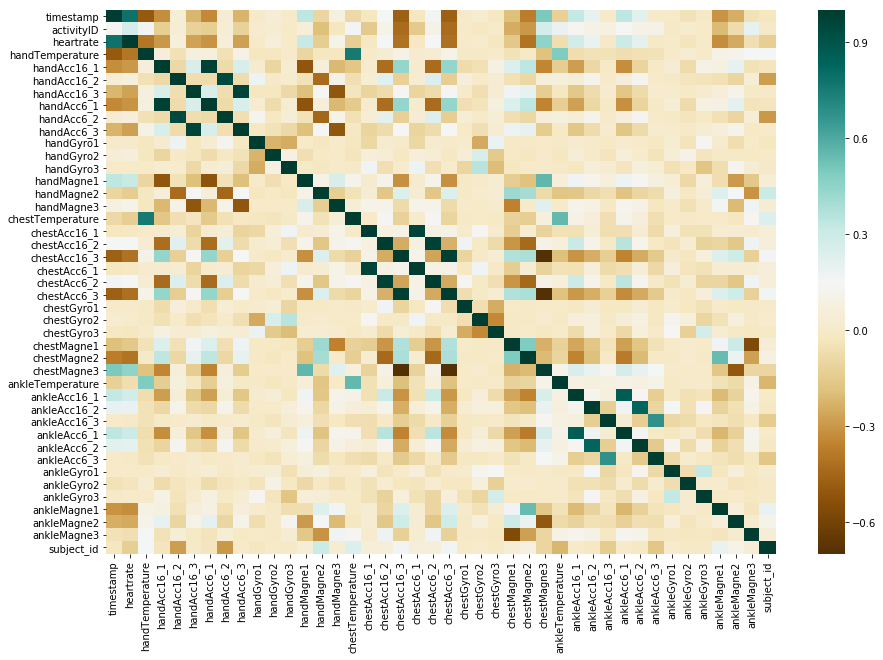

In [16]:
from pandas.plotting import scatter_matrix
df_corr = train_df.corr()
df_corr = df_corr.drop(['activityID'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

Our heatmap shows how much statistical similarity there is between our different columns. We can every easily observe that the gyroscopes do not correlate with any of our other data and seem unneeded in this model. 

On the other hand we can understand the correlation between accelerometers of the hand and temperature. The two are strongly correlated on all three instances of hand accelerometers. 

Furthermore the chest Magnetometers seem to be correlated with heart rate and it is very logical as they very close together on the body.

## Hypothesis Testing

The most cumbersome activities seem to be running and rope jumping as seen from bar charts plotted above. Therefore our hypothesis testing will be based on these two activities and how their heart rate data correlates with the rest of the activities' heart rates. This will be done by getting the mean heart rate of the two activities and them comparing it to the mean heart rate of all activities.

**Null Hypothesis: **
- h0 : The mean heart rate of the cumbersome activities has no mass difference from the mean of all activities

**Non Null Hypothesis: **

- h1 : The mean heart rate of the cumbersome activities has mass difference from the mean of all activities

In [17]:
running_data = train_df.loc[(train_df["activityID"] == 5)]
ropejumping_data = train_df.loc[(train_df["activityID"] == 24)]
cumbersome_data = running_data + ropejumping_data

In [18]:
import scipy.stats

p = train_df['heartrate'].mean() / (running_data['heartrate'].std() / math.sqrt( running_data['heartrate'].count() ))
pValue = 1 - scipy.stats.norm.cdf(p)

if pValue > 0.1:
    print("The p_value is ", pValue, " and h1 is rejected. There is no mass difference between the means of cumbersome activities and all activities.")
else:
    print("The p_value is ", pValue, " and h0 is rejected. There is mass difference between the means of cumbersome activities and all activities.")


The p_value is  0.0  and h0 is rejected. There is mass difference between the means of cumbersome activities and all activities.


After making sure that our hypothesis is non null, proving that the mean of the heart rate of the two most cumbersome activities is in fact very different from the mean heart rate of all the activities we can move on into Modelling where we will be looking at different modelling algorithms and will be choosing one as the modelling algorithm that would be used after testing.

## Modelling

Some variables have to be dropped which would impact our modelling precision. The variables to be dropped are timestamp and subject_id as they are numeric numbers which would our modelling method would use in its calculations but since their values don't have any meaning, the modelling method used would have noise and predictions of accuracy would be innacurate.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [20]:
train_df = train_df.drop(["timestamp", "subject_id"],1)

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler

#apply scaling to all columns except subject and activity 
scaler = RobustScaler()
df_scaled = train_df.copy()
df_scaled_test = test_df.copy()

df_scaled.iloc[:,1:41] = scaler.fit_transform(df_scaled.iloc[:,1:41])
df_scaled_test.iloc[:,1:41] = scaler.fit_transform(df_scaled_test.iloc[:,1:41])

df_scaled.head()

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
312921,3,-0.368421,0.447368,-0.384512,0.220069,-0.572507,-0.361436,0.256971,-0.530520,-0.012729,...,0.321939,0.088339,-0.322152,0.351800,0.220183,0.001165,-0.139354,0.641700,-0.582432,0.658114
141735,12,1.681818,0.236842,-0.721708,-0.103407,-0.206281,-0.625117,-0.108947,-0.253147,-0.868631,...,0.020813,0.842160,-0.269519,-0.185601,-0.829881,3.024896,-0.265261,-0.744416,1.091512,-0.924482
1191085,24,2.026316,0.289474,0.457975,0.035504,-2.015047,0.603512,0.072534,-1.452154,-5.190897,...,1.905139,-7.260794,-0.946788,1.482238,5.524513,-0.773631,-1.222988,-0.447203,-0.428537,-0.674781
1206914,1,-1.105263,0.131579,1.290689,-0.693932,0.901352,1.320385,-0.723956,0.911347,0.065061,...,-0.351884,-5.128883,-2.300004,-0.300736,-0.037313,0.027350,0.037709,0.700615,0.847494,-0.859194
1710520,2,-0.657895,0.500000,0.434876,-2.413007,-0.473610,0.449008,-2.412753,-0.481267,-0.015890,...,-0.107595,-0.192439,0.783229,-0.057162,0.016440,0.068780,0.058657,0.611770,0.497042,0.263863


In [22]:
X_train = df_scaled.drop('activityID', axis=1).values
y_train = df_scaled['activityID'].values

# Test Dataset
X_test = df_scaled.drop('activityID', axis=1).values
y_test = df_scaled['activityID'].values

### Dimensionality reduction using Principal Component Analysis(PCA)


Usually 90-98% of the variance will explain our data really well. So by plotting the variance ratio aginst the number of componments we could see how many of those we could use. As we see from the graph below 15 componments fall around to 94% of the variance. 

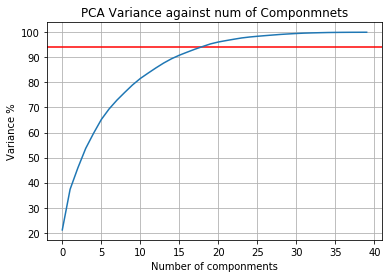

In [23]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against num of Componmnets")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(94, color="red")

plt.plot(var1)
plt.grid()


In [ ]:
pca = PCA(n_components=17)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

### Choosing the best model
In this section we will train two models and check their performance.

We are going to focus on two modelling algorithms, Random Forest and Logistic Regression.

**Random Forest** algorithm can be used for both classification and regression which makes it a very versatile modelling algorithm. As the name implies, Random Forest is a forest of trees, decision trees which are randomly populating the forest. The algorithms creates and combines decision trees together, the more trees in the forest, the better the accuracy of its predictions will be.

Random Forest algorithms are good because of the high accuracy they provide as well as that they are flexible i.e. can work for both classification and regression modelling. In addition, Random Forest facilitates for good performance of high dimensionality datasets which our dataset has. 

**Logistic Regression** algorithm is a simple algorithm that can be used for binary/multivariate classification tasks. The result of it is a probability that a data point is part of a class.

In [ ]:
def get_metrics (y_true,y_pred):
    acc = accuracy_score(y_true, y_pred)
    err = 1-acc
    p = precision_score(y_true, y_pred,average=None).mean()
    r = recall_score(y_true, y_pred, average=None).mean()
    f1 = f1_score(y_true, y_pred, average=None).mean()
   
    print("Accuracy: ",acc)
    print("Error: ",acc)
    print("Precision", p)
    print("Recall", r)
    print("F1", f1)
    #print("Accuracy: %.3f \nError: %.3f \nPrecesion: %.3f \nRecall: %.3f \nF1:%.3f \n"% (acc,err,p,r,f1) )
    

log_reg = LogisticRegression()
log_reg.fit(X=X_train, y=y_train )
y_pred_lr = log_reg.predict(X_test)
get_metrics(y_test, y_pred_lr)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs =4)
rfc.fit(X_train,y_train)
y_pred_rf = rfc.predict(X_test)
get_metrics(y_test,y_pred_rf)

###  Cross validation

Even though the above models seem to perform really good, the metrics used for that do not represent the real score since the models were train on a specific part of the dataset. By using cross validation, we could k=10 number of folds, which in few words, will generate 10 different samples. By doing that we will get 10 different metrics values. The mean value of these metrics will show a better representation of our model's performance

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

classifiers = [LogisticRegression(),
               RandomForestClassifier(n_jobs =4)]

score_lst = []
for cls in classifiers:
    accs  = accuracy_score(y_train, cross_val_predict(cls,X_train,y_train,cv = 10))  #cross validate the accurancy 
    scores = cross_val_score(cls,X_train,y_train,scoring = "neg_mean_squared_error",cv= 10)#calcuate the error
    score = np.sqrt(-scores)
    f1 = cross_val_score(cls,X_test, y_test,scoring = "f1_macro", cv =10)
    
    
    #p = cross_val_score(cls,X_test, y_test,scoring = "average_precision", cv =10)
#     r = recall_score(y_true, y_pred, average=None).mean()
#     f1 = f1_score(y_true, y_pred, average=None).mean()
    score_lst.append([cls.__class__.__name__,accs,score.mean(), f1.mean()])

df_scores=pd.DataFrame(columns = ["Claasifier","Accurancy","MSE","F1"],data =  score_lst)
display(df_scores)

As this took a lot of time to compute the results of the above cells, it is uploaded without the outputs but work and should be run by the examiner as the computer that I am using has very few processing capabilities.

## References

Archive.ics.uci.edu. (2012). UCI Machine Learning Repository: PAMAP2 Physical Activity Monitoring Data Set. [online] Available at: http://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring [Accessed 15 Dec. 2018].

Chandrayan, P. (2017). Machine Learning Part 3 : Logistic Regression – Towards Data Science. [online] Towards Data Science. Available at: https://towardsdatascience.com/machine-learning-part-3-logistics-regression-9d890928680f [Accessed 2 Jan. 2019].

DeZyre. (n.d.). Principal Component Analysis Tutorial. [online] Available at: https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial [Accessed 30 Dec. 2018].

Donges, N. (2018). The Random Forest Algorithm – Towards Data Science. [online] Towards Data Science. Available at: https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd [Accessed 3 Jan. 2019].

PAMAP2_Dataset: Physical Activity Monitoring. (n.d.). [ebook] Available at: http://archive.ics.uci.edu/ml/machine-learning-databases/00231/readme.pdf [Accessed 15 Dec. 2018].

Scikit-learn.org. (n.d.). Robust Scaling on Toy Data — scikit-learn 0.18.2 documentation. [online] Available at: https://scikit-learn.org/0.18/auto_examples/preprocessing/plot_robust_scaling.html [Accessed 2 Jan. 2019].